<a href="https://colab.research.google.com/github/christianadriano/PCA_AquacultureSystem/blob/master/PCA_KMeans_Economic_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd #tables for data wrangling
import numpy as np #basic statistical methods 
import io #for uploading data

#Manual option
from google.colab import files
uploaded1 = files.upload() #choose file dados_relativizados_carcinicultura.csv



Saving dados_relativizados_centralizados_carcinicultura.csv to dados_relativizados_centralizados_carcinicultura (1).csv


In [44]:
#Upload data from cvs file
df1 = pd.read_csv(io.StringIO(uploaded1['dados_relativizados_centralizados_carcinicultura.csv'].decode('utf-8'))) 
print(df1)

    Unnamed: 0         cultura  ...    S19_IR    S20_IE
0            0  Carcinicultura  ... -0.015126 -0.181345
1            1  Carcinicultura  ... -3.007332  1.033912
2            2  Carcinicultura  ...  0.028468 -1.738392
3            3  Carcinicultura  ...  0.168525 -0.540663
4            4  Carcinicultura  ...  0.038207 -0.549427
5            5  Carcinicultura  ...  0.245973 -0.540663
6            6  Carcinicultura  ...  0.068815  1.393230
7            7  Carcinicultura  ... -0.217791 -0.937959
8            8  Carcinicultura  ... -0.385673 -1.043125
9            9  Carcinicultura  ... -0.217791  1.895692
10          10  Carcinicultura  ...  1.097908  0.402913
11          11  Carcinicultura  ...  1.097908  0.402913
12          12  Carcinicultura  ...  1.097908  0.402913

[13 rows x 50 columns]


In [45]:
column_names = df1.columns
#Select fatores Economicos 
feature_names = [name for name in column_names if name.startswith("E")] 

#feature_names = list(df.columns["E1_RRLII":"E13_DM"])
#print(feature_names)
list_names = ['cultivo'] + feature_names
df_cultivo_1 = df1[list_names]
df_cultivo_1.head()



,cultivo,E1_RRLII,E2_TIR,E3_PRC,E4_RBC,E5_VPL,E6_LL,E9_R,E10_PPA,E11_TR,E12_DP,E13_DM
0,M. rosenbergii - Espirito Santo-,-0.942112,-0.839782,-0.747442,-0.884302,-0.254734,-0.273158,-0.673110,-0.397504,0.006537,-0.508001,-1.425162
1,P. vannamei - Sergipe - Semi intensivo,2.444167,2.196693,1.370910,2.539184,1.943953,2.340385,2.166584,-1.043447,-0.852734,1.143001,-1.425162
2,L. vannamei - Aquafort,-0.777345,-0.422557,-0.268325,-0.540195,-0.417138,-0.354454,-0.772770,1.281949,-0.852734,2.794003,1.221568
3,L. vannamei - Northern,-0.738076,-0.589447,-0.489040,-0.536485,-0.363371,-0.321661,-0.674301,-0.009938,-0.852734,-0.508001,-0.101797
4,L. vannamei - Aquacrusta,-0.213248,0.235732,0.395775,0.001547,-0.193271,-0.114267,-0.492830,2.573836,-0.852734,1.143001,0.559885


In [46]:
#Load data from Piscultura
from google.colab import files
uploaded2 = files.upload() #choose file dados_relativizados_centralizados_piscicultura.csv

Saving dados_relativizados_centralizados_piscicultura.csv to dados_relativizados_centralizados_piscicultura (1).csv


In [51]:
#Upload data from cvs file
df2 = pd.read_csv(io.StringIO(uploaded2['dados_relativizados_centralizados_piscicultura.csv'].decode('utf-8'))) 
print(df2)

column_names = df2.columns
#Select fatores Economicos
feature_names = [name for name in column_names if name.startswith("E")] 

#feature_names = list(df.columns["E1_RRLII":"E13_DM"])
print(feature_names)
list_names = ['cultivo'] + feature_names
#df_cultivo_2 = df2[list_names]
#df_cultivo_2.head()


    Unnamed: 0       cultura  ...        S19_IR        S20_IE
0            0  Piscicultura  ...  2.686547e+00  5.807265e-01
1            1  Piscicultura  ...  1.110000e-10 -1.060000e-10
2            2  Piscicultura  ...  1.110000e-10 -1.060000e-10
3            3  Piscicultura  ...  1.110000e-10 -1.060000e-10
4            4  Piscicultura  ... -7.788328e-01 -1.011749e+00
5            5  Piscicultura  ... -7.814740e-01 -1.009361e+00
6            6  Piscicultura  ... -7.829435e-01 -1.001854e+00
7            7  Piscicultura  ...  1.110000e-10 -1.060000e-10
8            8  Piscicultura  ...  1.375874e+00  2.816735e+00
9            9  Piscicultura  ... -7.467544e-01 -7.313371e-01
10          10  Piscicultura  ... -6.060225e-01 -2.662038e-02
11          11  Piscicultura  ... -3.663944e-01  3.834602e-01

[12 rows x 37 columns]
['E1_RRLII', 'E2_TIR', 'E3_PRC', 'E4_RBC', 'E5_VPL', 'E6_LL', 'E9_R', 'E11_TR', 'E12_DP', 'E13_DM']


In [7]:
#Merge only rows that have the same column names
df_cultivo = pd.concat([df_cultivo_1, df_cultivo_2], axis=0, join="inner",ignore_index=True)
print(df_cultivo.columns)
#combined_df.dropna(axis=1)
#print(combined_df["S7_PA"])
df_cultivo

Index(['cultivo', 'A2_DA', 'A3_UE', 'A5_UN', 'A6_UF', 'A7_EUE', 'A8_EUN',
       'A9_EUF', 'A12_PPO', 'A22_REC', 'A4_EUC'],
      dtype='object')


,cultivo,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC
0,M. rosenbergii - Espirito Santo-,-7.584569e-01,-0.486930,-0.925341,1.523464,3.361357,-0.981900,1.548494,8.990461e-01,0.288675,-3.354904e+00
1,P. vannamei - Sergipe - Semi intensivo,-5.080451e-01,-0.485603,0.273754,-0.409546,0.339940,2.538890,2.031101,1.625857e+00,-3.464102,9.909967e-01
2,L. vannamei - Aquafort,-4.941398e-01,-0.486010,0.762122,-0.225905,-0.495083,0.292514,0.809588,-4.139118e-01,0.288675,3.228792e-01
3,L. vannamei - Northern,-4.640998e-01,-0.486159,0.126027,-0.435625,-0.683614,-0.870315,-0.245603,-1.370484e+00,0.288675,7.194307e-02
4,L. vannamei - Aquacrusta,-2.742864e-01,-0.485371,0.659405,-0.751543,-0.169375,-1.310781,-0.747296,-1.675020e-01,0.288675,3.743935e-02
5,L. vannamei - HM,-2.693047e-01,-0.485612,0.638636,-0.633485,-0.277006,0.809328,0.365154,-1.280953e+00,0.288675,2.444617e-01
6,L. vannamei - Ilha,4.688350e-03,-0.485826,-0.089000,-0.662892,-0.402224,1.011942,0.130667,-8.975311e-01,0.288675,4.483473e-01
7,L. vannamei - Carpixe,1.014354e+00,-0.485467,0.277971,-0.722049,-0.198217,0.251404,-0.515536,-1.013961e-01,0.288675,5.312286e-02
8,L. vannamei - Marinus,1.348885e+00,-0.485625,1.550973,-0.517750,-0.279820,0.357116,0.457858,-1.181226e-01,0.288675,5.173547e-01
9,L. vannamei - Aquabrasilis,2.648823e+00,-0.485523,-0.199183,-0.930004,0.002273,-0.315328,-0.136539,2.129743e+00,0.288675,1.629074e-01


In [8]:
#Look at correlations 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_cultivo.corr()

# using a styled panda's dataframe from https://stackoverflow.com/a/42323184/1215012
cmap = 'coolwarm'

def magnify():
    return [dict(selector="th", props=[("font-size", "7pt")]),
            dict(selector="td", props=[('padding', "0em 0em")]),
            dict(selector="th:hover", props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover", 
                 props=[('max-width', '200px'), ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC
A2_DA,1.00,-0.18,0.19,-0.21,0.05,0.21,0.05,0.07,-0.16,0.04
A3_UE,-0.18,1.00,-0.08,0.23,0.33,0.13,0.14,-0.05,-0.13,0.44
A5_UN,0.19,-0.08,1.00,0.21,0.13,0.29,0.48,-0.03,-0.23,0.43
A6_UF,-0.21,0.23,0.21,1.00,0.14,-0.26,-0.07,0.06,-0.07,-0.22
A7_EUE,0.05,0.33,0.13,0.14,1.00,0.31,0.74,0.14,-0.20,-0.10
A8_EUN,0.21,0.13,0.29,-0.26,0.31,1.00,0.64,-0.05,-0.31,0.38
A9_EUF,0.05,0.14,0.48,-0.07,0.74,0.64,1.00,0.14,-0.48,0.27
A12_PPO,0.07,-0.05,-0.03,0.06,0.14,-0.05,0.14,1.00,-0.23,-0.10
A22_REC,-0.16,-0.13,-0.23,-0.07,-0.20,-0.31,-0.48,-0.23,1.00,-0.38
A4_EUC,0.04,0.44,0.43,-0.22,-0.10,0.38,0.27,-0.10,-0.38,1.00


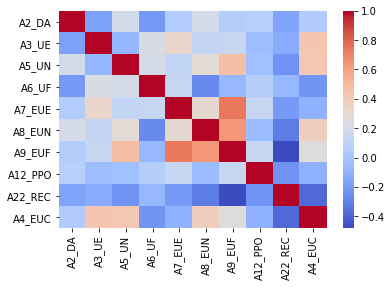

In [9]:
#smaller chart
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

In [10]:
#check which ones are statiscally significant
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

p_values = calculate_pvalues(df_cultivo)


In [11]:
#Plot p-values
def highlight_significant(val):
    '''
    highlight in blue only the statistically significant cells
    '''
    color = 'blue' if val < 0.05 else 'grey'
    return 'color: %s' % color

p_values.style.applymap(highlight_significant)

,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC
A2_DA,0.000000,0.393400,0.353100,0.318600,0.809900,0.306900,0.804800,0.740800,0.452700,0.838200
A3_UE,0.393400,0.000000,0.714400,0.264100,0.105800,0.544500,0.493900,0.830500,0.533300,0.028700
A5_UN,0.353100,0.714400,0.000000,0.315900,0.551300,0.158700,0.016400,0.898900,0.259400,0.031300
A6_UF,0.318600,0.264100,0.315900,0.000000,0.508400,0.207800,0.746600,0.760100,0.747600,0.287300
A7_EUE,0.809900,0.105800,0.551300,0.508400,0.000000,0.132100,0.000000,0.491800,0.333500,0.626300
A8_EUN,0.306900,0.544500,0.158700,0.207800,0.132100,0.000000,0.000600,0.815000,0.125300,0.058600
A9_EUF,0.804800,0.493900,0.016400,0.746600,0.000000,0.000600,0.000000,0.502600,0.015100,0.193900
A12_PPO,0.740800,0.830500,0.898900,0.760100,0.491800,0.815000,0.502600,0.000000,0.263100,0.641400
A22_REC,0.452700,0.533300,0.259400,0.747600,0.333500,0.125300,0.015100,0.263100,0.000000,0.061300
A4_EUC,0.838200,0.028700,0.031300,0.287300,0.626300,0.058600,0.193900,0.641400,0.061300,0.000000


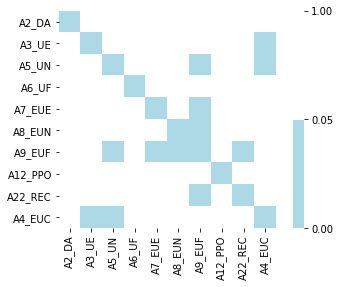

In [12]:
#Smaller plot of p-values
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

np.random.seed(101)
zvals = np.random.rand(100, 100) * 10

# make a color map of fixed colors
cmap_discrete = colors.ListedColormap(['lightblue', 'white'])
bounds=[0,0.05,1]
norm_binary = colors.BoundaryNorm(bounds, cmap_discrete.N)

# tell imshow about color map so that only set colors are used
img = plt.imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap_discrete, norm=norm_binary)

sns.heatmap(p_values, xticklabels=p_values.columns, yticklabels=p_values.columns, cmap=cmap_discrete, norm=norm_binary)

**PCA** 
Now we do the PCA 

In [13]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_cultivo.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
#print(x)
x.shape


(25, 10)

In [17]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

df_components = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])

df_components= pd.concat([df_cultivo['cultivo'],df_components], axis = 1)

['M. rosenbergii - Espirito Santo-'
 'P. vannamei - Sergipe - Semi intensivo' 'L. vannamei - Aquafort'
 'L. vannamei - Northern' 'L. vannamei - Aquacrusta' 'L. vannamei - HM'
 'L. vannamei - Ilha' 'L. vannamei - Carpixe' 'L. vannamei - Marinus'
 'L. vannamei - Aquabrasilis' 'L. vannamei - Aquarium - baixa densid.'
 'L. vannamei - Aquarium - alta densis'
 'L. vannamei - Aquarium-  bifasico' 'Truta - race-way'
 'Tilapia - gaiolas - SP -  sem restricao alimentar'
 'Tilapia - gaiolas - SP - com restricao alimentar'
 'Tilapia - gaiola - RS' 'Tambatinga - viveiro 2'
 'Tambatinga - viveiro 23' 'Tambatinga - viveiro 250'
 'Tambaqui - M amazonicum - policultivo - SP' 'Tilapia - tanque rede - RN'
 'Lambari - semi intensivo - baixo controle'
 'Lambari - semi intensivo - médio controle'
 'Lambari - semi intensivo - alto controle']


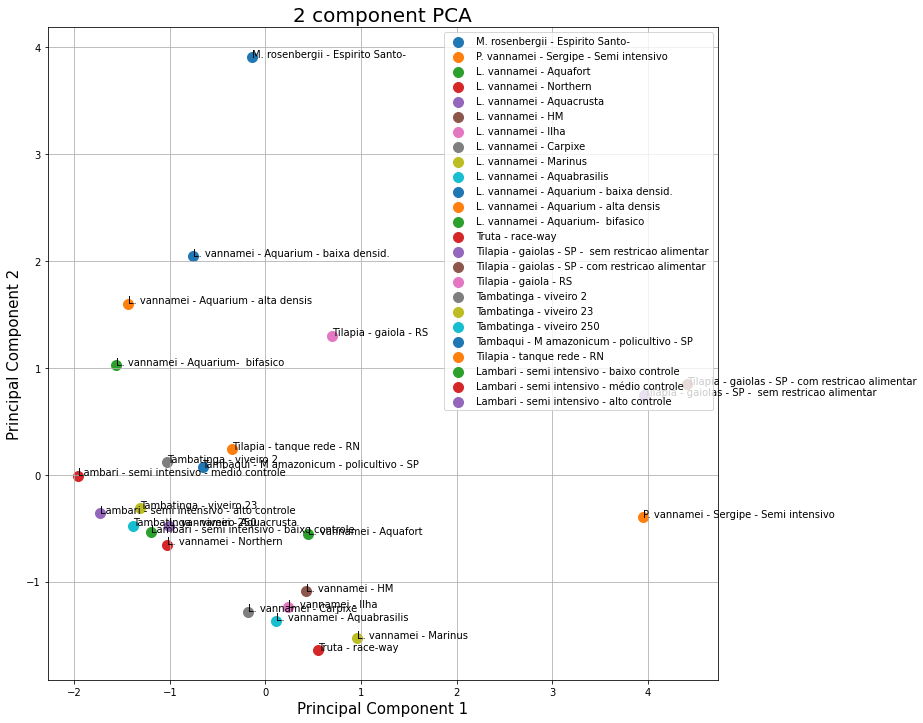

In [18]:
#Visualize results of PCA in Two Dimensions
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()
print(targets)
for target in targets:
    indicesToKeep = df_components['cultivo'] == target
    x = df_components.loc[indicesToKeep, 'principal component 1']
    y = df_components.loc[indicesToKeep, 'principal component 2']
    ax.scatter(x,y,s = 100)
    ax.annotate(target, (x,y))

#for name in targets:  
    
ax.legend(targets)
ax.grid()

In [19]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))


variance explained by each component: [0.29420884 0.15685051]
total variance explained: 0.4510593469805976


In [20]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]), 'pc2': list(principalComponents[:,1])}, columns=['cultivo', 'pc1','pc2'])
#df_clustering

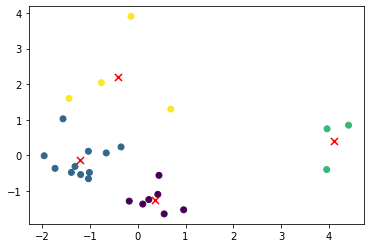

In [21]:
#4 clusters 
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, marker='x', color="red"); # Show the 

In [22]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
2,L. vannamei - Aquafort,0.444442,-0.557326,0
5,L. vannamei - HM,0.421083,-1.091237,0
6,L. vannamei - Ilha,0.232384,-1.237639,0
7,L. vannamei - Carpixe,-0.177406,-1.281033,0
8,L. vannamei - Marinus,0.960731,-1.524775,0
9,L. vannamei - Aquabrasilis,0.105888,-1.363540,0
13,Truta - race-way,0.553102,-1.640137,0
12,L. vannamei - Aquarium- bifasico,-1.561259,1.028278,1
22,Lambari - semi intensivo - baixo controle,-1.192828,-0.536203,1
21,Tilapia - tanque rede - RN,-0.348100,0.239540,1


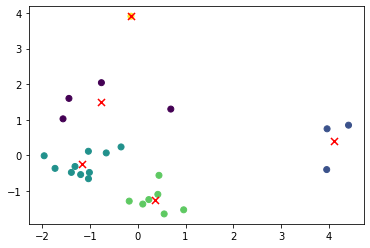

In [25]:
#5 clusters
model = KMeans(5)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50,  marker='x', color="red"); # Show the 


In my view, we have two large clusters and three outliers, as the graph above shows.

In [26]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
12,L. vannamei - Aquarium- bifasico,-1.561259,1.028278,0
16,Tilapia - gaiola - RS,0.691946,1.302006,0
10,L. vannamei - Aquarium - baixa densid.,-0.758783,2.042865,0
11,L. vannamei - Aquarium - alta densis,-1.437610,1.601526,0
1,P. vannamei - Sergipe - Semi intensivo,3.950786,-0.395580,1
15,Tilapia - gaiolas - SP - com restricao alimentar,4.407119,0.850119,1
14,Tilapia - gaiolas - SP - sem restricao alimentar,3.958652,0.748504,1
22,Lambari - semi intensivo - baixo controle,-1.192828,-0.536203,2
21,Tilapia - tanque rede - RN,-0.348100,0.239540,2
20,Tambaqui - M amazonicum - policultivo - SP,-0.657809,0.071458,2


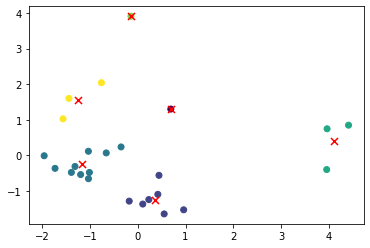

In [27]:
#6 clusters
model = KMeans(6)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, marker='x', color="red"); # Show the 

#7 clusters

In [28]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
16,Tilapia - gaiola - RS,0.691946,1.302006,0
2,L. vannamei - Aquafort,0.444442,-0.557326,1
5,L. vannamei - HM,0.421083,-1.091237,1
6,L. vannamei - Ilha,0.232384,-1.237639,1
7,L. vannamei - Carpixe,-0.177406,-1.281033,1
8,L. vannamei - Marinus,0.960731,-1.524775,1
9,L. vannamei - Aquabrasilis,0.105888,-1.363540,1
13,Truta - race-way,0.553102,-1.640137,1
24,Lambari - semi intensivo - alto controle,-1.728065,-0.361777,2
18,Tambatinga - viveiro 23,-1.310945,-0.308396,2


In [29]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
16,Tilapia - gaiola - RS,0.691946,1.302006,0
2,L. vannamei - Aquafort,0.444442,-0.557326,1
5,L. vannamei - HM,0.421083,-1.091237,1
6,L. vannamei - Ilha,0.232384,-1.237639,1
7,L. vannamei - Carpixe,-0.177406,-1.281033,1
8,L. vannamei - Marinus,0.960731,-1.524775,1
9,L. vannamei - Aquabrasilis,0.105888,-1.363540,1
13,Truta - race-way,0.553102,-1.640137,1
24,Lambari - semi intensivo - alto controle,-1.728065,-0.361777,2
18,Tambatinga - viveiro 23,-1.310945,-0.308396,2


Now we analyze 3 Principal Components



In [30]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_cultivo.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
#print(x)

In [31]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df_cultivo[['cultivo']]], axis = 1)

In [33]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]), 'pc2': list(principalComponents[:,1]),'pc3': list(principalComponents[:,2])}, columns=['cultivo', 'pc1','pc2','pc3'])
#df_clustering

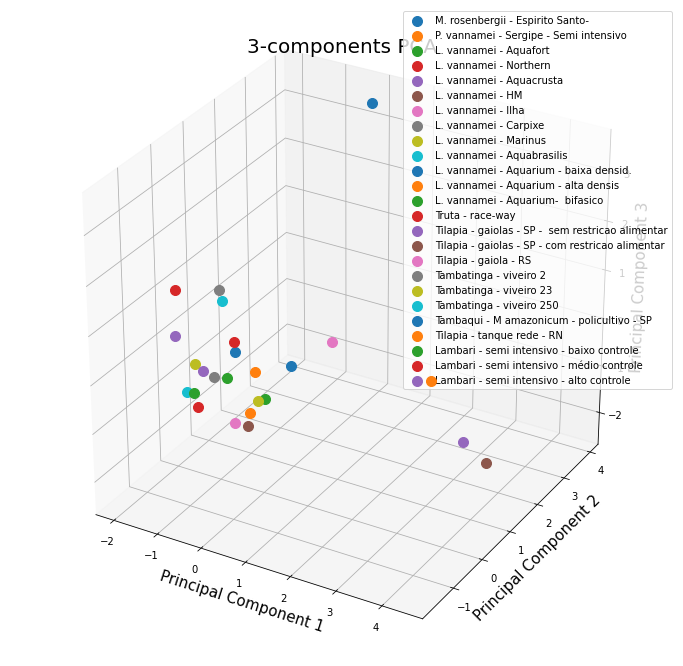

In [34]:
#Visualize results of PCA in Three Dimensions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)
    
ax.legend(targets)
ax.grid()

In [35]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))

variance explained by each component: [0.29420884 0.15685051 0.13949307]
total variance explained: 0.5905524181659232


Now we search for clusters for 3 principal components

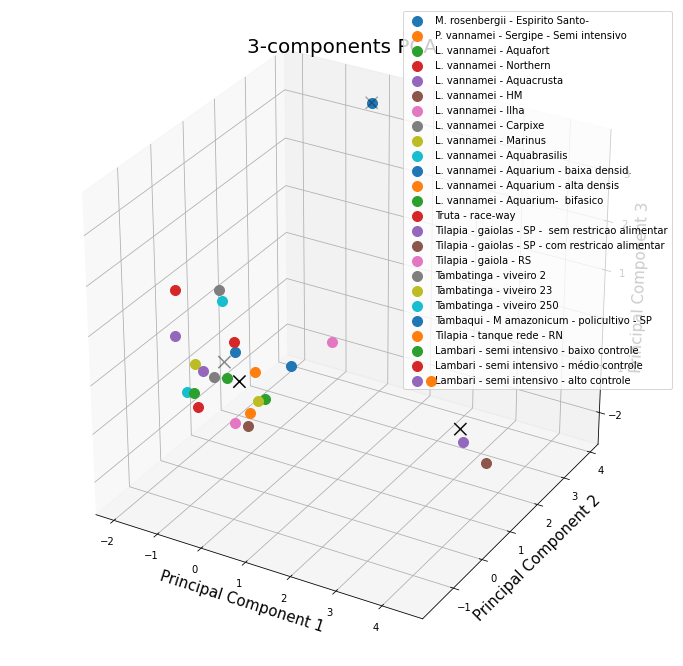

In [36]:
#4 clusters 
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 
   
ax.legend(targets)
ax.grid()

In [37]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]),
                              'pc2': list(principalComponents[:,1]),'pc3': list(principalComponents[:,2])},
                              columns=['cultivo', 'pc1','pc2','pc3'])
#df_clustering

In [38]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')


,cultivo,pc1,pc2,pc3,cluster
0,M. rosenbergii - Espirito Santo-,-0.140785,3.907144,3.415801,0
22,Lambari - semi intensivo - baixo controle,-1.192828,-0.536203,-0.610552,1
21,Tilapia - tanque rede - RN,-0.348100,0.239540,-0.363567,1
20,Tambaqui - M amazonicum - policultivo - SP,-0.657809,0.071458,0.058464,1
19,Tambatinga - viveiro 250,-1.386692,-0.475187,-0.692080,1
18,Tambatinga - viveiro 23,-1.310945,-0.308396,-0.177237,1
17,Tambatinga - viveiro 2,-1.031003,0.118109,1.211293,1
16,Tilapia - gaiola - RS,0.691946,1.302006,-0.036514,1
23,Lambari - semi intensivo - médio controle,-1.955378,-0.008036,1.035119,1
11,L. vannamei - Aquarium - alta densis,-1.437610,1.601526,-2.270231,1


Comparing k-means of PC12 with PC123, we see that the cluster membership changes completely.

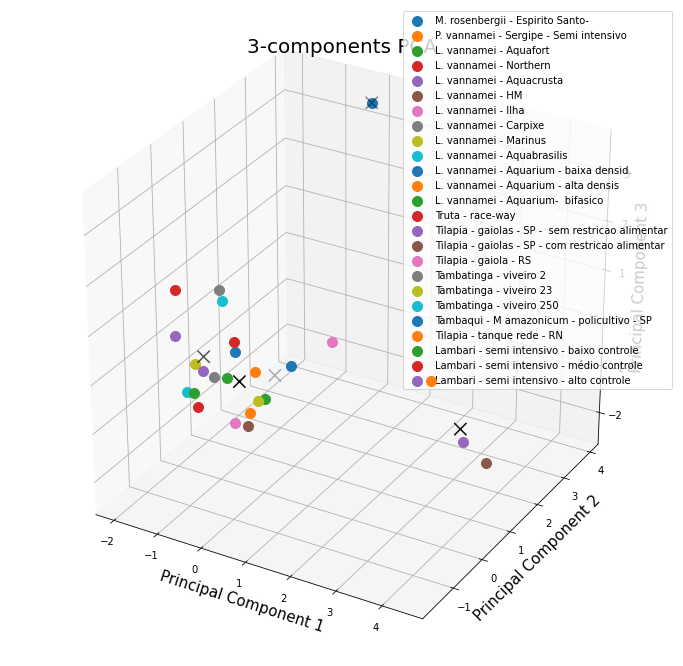

In [39]:
#5 clusters 
from sklearn.cluster import KMeans
model = KMeans(5)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
#plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
#plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)
    #ax.annotate(target, (x,y))

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 

#for name in targets:  
    
ax.legend(targets)
ax.grid()

In [40]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,pc3,cluster
9,L. vannamei - Aquabrasilis,0.105888,-1.363540,2.023176,0
2,L. vannamei - Aquafort,0.444442,-0.557326,-0.294922,0
5,L. vannamei - HM,0.421083,-1.091237,-0.563813,0
6,L. vannamei - Ilha,0.232384,-1.237639,-0.461242,0
7,L. vannamei - Carpixe,-0.177406,-1.281033,0.373990,0
8,L. vannamei - Marinus,0.960731,-1.524775,0.331787,0
13,Truta - race-way,0.553102,-1.640137,1.465138,0
1,P. vannamei - Sergipe - Semi intensivo,3.950786,-0.395580,0.931611,1
15,Tilapia - gaiolas - SP - com restricao alimentar,4.407119,0.850119,-1.289646,1
14,Tilapia - gaiolas - SP - sem restricao alimentar,3.958652,0.748504,-0.918183,1


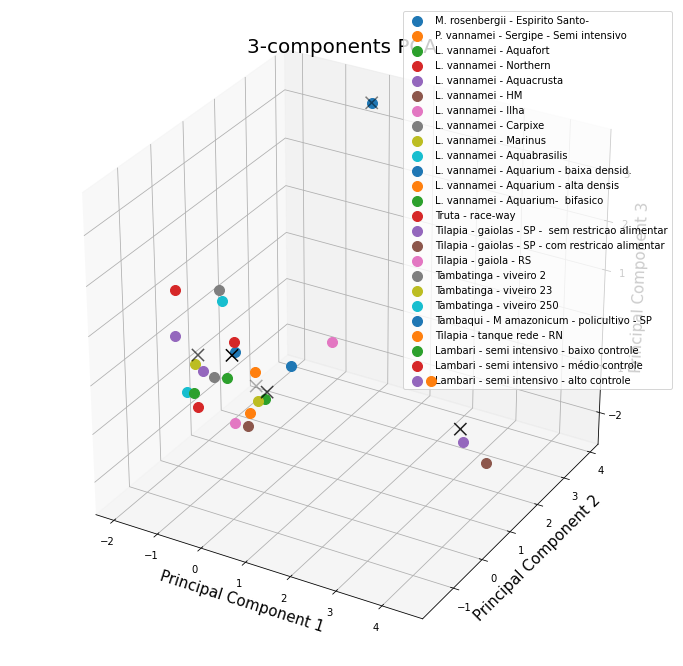

In [41]:
#6 clusters 
from sklearn.cluster import KMeans
model = KMeans(6)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
#plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
#plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 
    
ax.legend(targets)
ax.grid()

In [42]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,pc3,cluster
7,L. vannamei - Carpixe,-0.177406,-1.281033,0.373990,0
8,L. vannamei - Marinus,0.960731,-1.524775,0.331787,0
9,L. vannamei - Aquabrasilis,0.105888,-1.363540,2.023176,0
13,Truta - race-way,0.553102,-1.640137,1.465138,0
24,Lambari - semi intensivo - alto controle,-1.728065,-0.361777,0.317764,1
22,Lambari - semi intensivo - baixo controle,-1.192828,-0.536203,-0.610552,1
3,L. vannamei - Northern,-1.029462,-0.652213,-0.799342,1
4,L. vannamei - Aquacrusta,-1.010009,-0.476469,-0.137178,1
20,Tambaqui - M amazonicum - policultivo - SP,-0.657809,0.071458,0.058464,1
19,Tambatinga - viveiro 250,-1.386692,-0.475187,-0.692080,1
